<a href="https://colab.research.google.com/github/Gholamrezadar/Colab-notebooks/blob/main/Tamrin_4_DataMining_Gholamrezadar_96405037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gholamrezadar 5/23/2021
Random K-Means clustring vs K-Means++

using Silhouette and Knee method

ref : https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python

### Loading dataset
and creating numpy arrays

In [ ]:
!pip install kneed

In [153]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [154]:
# loading data
df = pd.DataFrame(pd.read_csv("fish.csv"))

# seperating features and labels
features  = df.drop(['species'], axis = 1) 
labels  = df['species'] 

In [ ]:
features.head()

In [ ]:
labels.head()

In [157]:
# convert dataframe to numpy array
features_array = features.values
labels_array = labels.values

In [ ]:
# debug numpy arrays
print(features_array[:5])
print()
print(labels_array[:5])

In [ ]:
# standardizations
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_array)
print(scaled_features[:5])

## Q1)

### KMEANS

In [ ]:
# Kmeans Clustering once
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=1
)
kmeans.fit(scaled_features)

In [161]:
# calculating Average K-Means Score with k=8

# doing everything 10 times and calculating average silhouette_score
kmeans_avg_score = 0
num_tries = 10
for i in range(num_tries):
  # Kmeans Clustering
  kmeans = KMeans(
      init="random",
      n_clusters=8,
      n_init=1,
      max_iter=300,
      random_state=i
  )

  kmeans.fit(scaled_features)

  kmeans_avg_score += silhouette_score(
      scaled_features, kmeans.labels_
  )

kmeans_avg_score /= num_tries
kmeans_avg_score = kmeans_avg_score.round(4)
print("K-Means average score", kmeans_avg_score)

K-Means average score 0.4457



### KMEANS++



In [162]:
# calculating Average K-Means++ Score with k=8

# doing everything 10 times and calculating average silhouette_score
kmeanspp_avg_score = 0
num_tries = 10
for i in range(num_tries):
  # Kmeans Clustering
  kmeanspp = KMeans(
      init="k-means++",
      n_clusters=8,
      n_init=1,
      max_iter=300,
      random_state=i
  )
  
  kmeanspp.fit(scaled_features)

  kmeanspp_avg_score += silhouette_score(
      scaled_features, kmeanspp.labels_
  )

kmeanspp_avg_score /= num_tries
kmeanspp_avg_score = kmeanspp_avg_score.round(4)
print("K-Means++ average score", kmeanspp_avg_score)

K-Means++ average score 0.4716


### Comparison

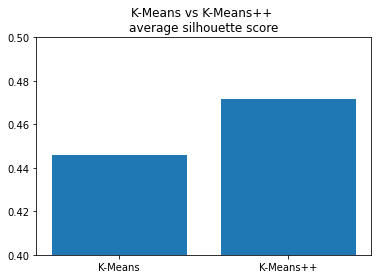

In [163]:
ax = plt.subplot()
ax.set_ylim([.4, 0.5])
ax.bar(["K-Means","K-Means++"],[kmeans_avg_score,kmeanspp_avg_score])
ax.set_title("K-Means vs K-Means++ \naverage silhouette score")
plt.show()

## Q2)

### Elbow Method
Using Elbow method to find the best cluster count

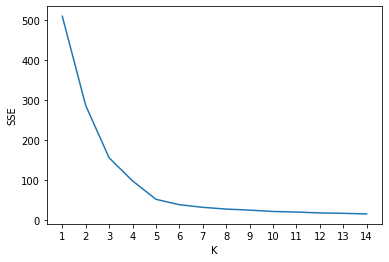

In [164]:
# keep track of error for each 'k'
errors = []
# find best 'k' between 1-15
for k in range(1, 15):
  kmeans = KMeans(
      init="random",
      n_clusters=k,
      n_init=10,
      max_iter=300,
      random_state=1)
  kmeans.fit(scaled_features)
  errors.append(kmeans.inertia_)
  

plt.plot(range(1, 15), errors)
plt.xticks(range(1, 15))
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [165]:
#finding best K
kl = KneeLocator(
    range(1, 15), errors, curve="convex", direction="decreasing"
)

print("Best K:",kl.elbow)

Best K: 5


### Silhouette Method
Using Silhouette method to find the best cluster count


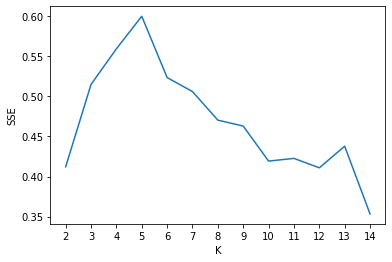

In [166]:
scores = []
# find best 'k' between 2-15
for k in range(2, 15):
  kmeans = KMeans(
      init="random",
      n_clusters=k,
      n_init=10,
      max_iter=300,
      random_state=1)
  kmeans.fit(scaled_features)
  score = silhouette_score(
      scaled_features, kmeans.labels_
  )
  scores.append(score)

plt.plot(range(2, 15), scores)
plt.xticks(range(2, 15))
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

In [167]:
print("Best K:",list(range(2,15))[scores.index(max(scores))])

Best K: 5


## BEST k=5